In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier,plot_tree 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
car_df = pd.read_csv("car_evaluation.csv",names=["buying price", "maintenance cost", "number of doors", "number of persons","lug_boot","safety","decision"])

car_df.head()

,buying price,maintenance cost,number of doors,number of persons,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
X=car_df.iloc[:,:-1]
y=car_df.iloc[:,-1:]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [5]:
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols=["buying price", "maintenance cost", "number of doors", "number of persons","lug_boot","safety"])


X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [6]:
clf = DecisionTreeClassifier()

In [7]:
clf = clf.fit(X_train,y_train)

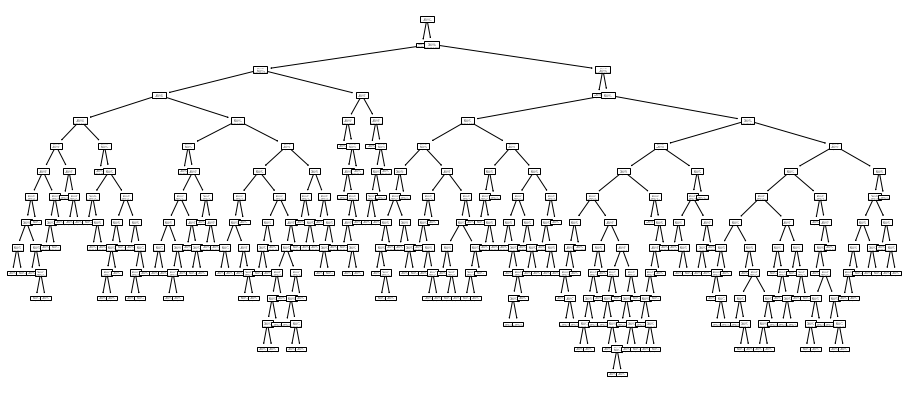

In [8]:
plt.figure(figsize=(16,7))
plot_tree(clf)
plt.show()

In [9]:
y_pred = clf.predict(X_test)
# y_pred

In [10]:
sc = metrics.accuracy_score(y_test,y_pred)
sc

0.8978805394990366

In [11]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [12]:
ccp_alphas

array([0.        , 0.00036761, 0.00036761, 0.00037221, 0.00038772,
       0.00045952, 0.00047265, 0.00049015, 0.00050129, 0.00055142,
       0.00055142, 0.00055142, 0.00055142, 0.00059081, 0.00060656,
       0.00062035, 0.00062035, 0.00062035, 0.00062035, 0.00062035,
       0.0006617 , 0.00068927, 0.00068927, 0.00068927, 0.00068927,
       0.00068927, 0.00070897, 0.00070897, 0.00073523, 0.00074442,
       0.00075194, 0.00081039, 0.00082713, 0.00082713, 0.00082713,
       0.00088227, 0.00093052, 0.00095317, 0.00096498, 0.00096498,
       0.00103391, 0.00110284, 0.00115798, 0.00117866, 0.00124069,
       0.00124069, 0.00124069, 0.00124069, 0.00128665, 0.00132341,
       0.00133814, 0.00137855, 0.00148883, 0.00180465, 0.00180465,
       0.00184036, 0.00185645, 0.00186104, 0.00189058, 0.00189462,
       0.00195029, 0.00207701, 0.00215398, 0.00219565, 0.0024723 ,
       0.00250337, 0.00254092, 0.00258885, 0.00322992, 0.00348265,
       0.00351756, 0.00381056, 0.00402078, 0.0040427 , 0.00440

In [13]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.07039214961886947


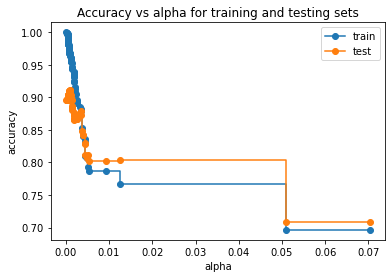

In [14]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [15]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.012)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.012, random_state=0)

In [16]:

pred=clf.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.8015414258188824

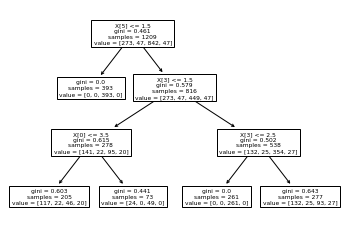

In [17]:
plot_tree(clf)
plt.show()